# Diabetes Prediction using Random Forest

In this notebook, we will explore how to predict the presence of diabetes using the Random Forest algorithm. We'll utilize a dataset containing various health-related features of patients.

## Table of Contents

1. [Importing Libraries](#Importing-Libraries)
2. [Loading the Data](#Loading-the-Data)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
4. [Data Preprocessing](#Data-Preprocessing)
    - [Encoding Categorical Variables](#Encoding-Categorical-Variables)
    - [Feature Scaling](#Feature-Scaling)
5. [Splitting the Data](#Splitting-the-Data)
6. [Training the Random Forest Model](#Training-the-Random-Forest-Model)
7. [Making Predictions](#Making-Predictions)
8. [Model Evaluation](#Model-Evaluation)
    - [Confusion Matrix](#Confusion-Matrix)
    - [Classification Report](#Classification-Report)
    - [Feature Importance](#Feature-Importance)
9. [Conclusion](#Conclusion)
10. [Additional Recommendations](#Additional-Recommendations)

---

## Importing Libraries

First, we'll import the necessary libraries for data manipulation, visualization, and machine learning.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data
We'll load the dataset from a CSV file. Ensure that the diabetes_prediction_dataset.csv file is in your working directory or provide the correct path to the file.

In [4]:
# Path to the CSV file
data_file = 'diabetes_prediction_dataset.csv'

# Loading the data
df = pd.read_csv(data_file)

# Display the first few rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

### Exploratory Data Analysis (EDA)
Before diving into model building, it's essential to understand the data's structure and check for any inconsistencies or missing values.

In [6]:
# Get information about the dataset
df.info()

# Get statistical summaries
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   hba1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hba1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Visualizing the Target Variable
Let's visualize the distribution of the target variable diabetes.

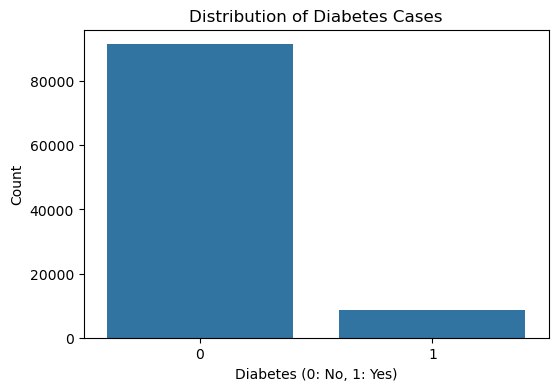

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [9]:
diabetes_counts = df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)
print(diabetes_counts)


diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039
Other        18     0


In [10]:
# Obliczanie procentowego udziału cukrzycy
diabetes_percent = diabetes_counts.div(diabetes_counts.sum(axis=1), axis=0) * 100
print(diabetes_percent)

diabetes           0         1
gender                        
Female     92.381131  7.618869
Male       90.251026  9.748974
Other     100.000000  0.000000


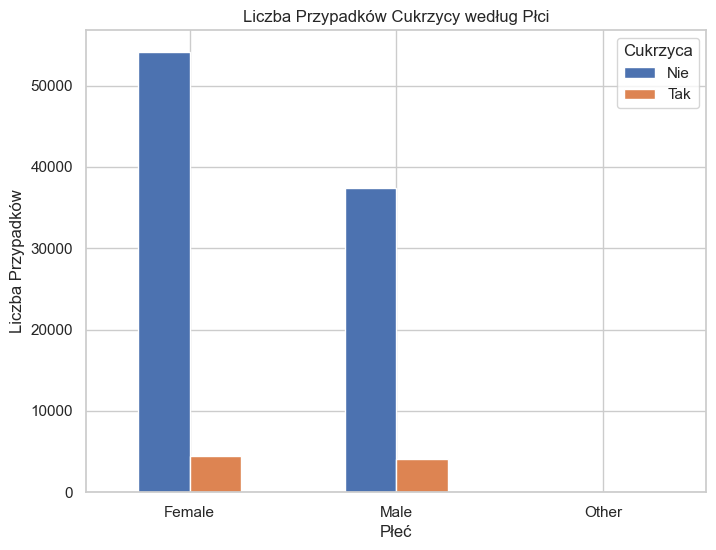

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia stylu
sns.set(style="whitegrid")

# Wykres słupkowy liczby przypadków cukrzycy według płci
diabetes_counts.plot(kind='bar', figsize=(8,6))
plt.title('Liczba Przypadków Cukrzycy według Płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba Przypadków')
plt.xticks(rotation=0)
plt.legend(title='Cukrzyca', labels=['Nie', 'Tak'])
plt.show()

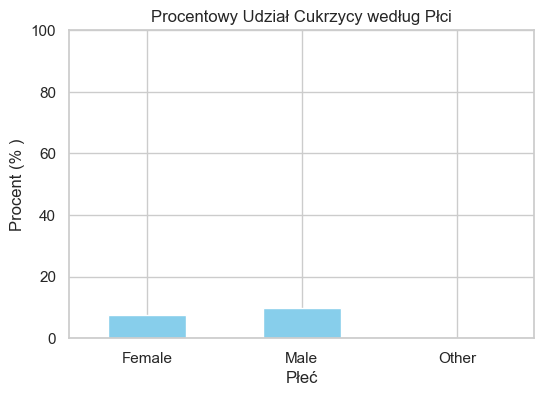

In [12]:
# Wykres słupkowy procentowego udziału cukrzycy według płci
diabetes_percent[1].plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title('Procentowy Udział Cukrzycy według Płci')
plt.xlabel('Płeć')
plt.ylabel('Procent (% )')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

In [13]:
from scipy.stats import chi2_contingency

# Dane do testu
chi2_data = diabetes_counts

# Przeprowadzenie testu chi-kwadrat
chi2, p, dof, ex = chi2_contingency(chi2_data)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(ex)

Chi2 Statistic: 143.21825102550298
p-value: 7.953383718307458e-32
Degrees of Freedom: 2
Expected Frequencies:
[[5.357508e+04 4.976920e+03]
 [3.790845e+04 3.521550e+03]
 [1.647000e+01 1.530000e+00]]


In [14]:
if p < 0.05:
    print("Istnieje istotny statystycznie związek między płcią a występowaniem cukrzycy.")
else:
    print("Nie ma istotnego statystycznie związku między płcią a występowaniem cukrzycy.")

Istnieje istotny statystycznie związek między płcią a występowaniem cukrzycy.


### Splitting the Data
We'll split the dataset into training and testing sets. We'll use 60% of the data for training and 20% for validation and testing.

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=len(df_test), random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.diabetes.values
y_train_full = df_train_full.diabetes.values
y_val = df_val.diabetes.values
y_test = df_test.diabetes.values


del df_train['diabetes']
del df_val['diabetes']
del df_test['diabetes']

### Data Preprocessing
Encoding Categorical Variables
The `gender` and `smoking_history` columns are categorical. We'll encode them into numerical values using `DictVectorizer`. This approach is particularly effective for handling categorical variables with multiple categories and ensures that the encoded features are suitable for machine learning algorithms.


In [ ]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
# Definicja cech i celu
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Oddzielenie zmiennych kategorycznych od numerycznych
categorical_features = ['gender', 'smoking_history']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Konwersja zmiennych kategorycznych na listę słowników
X_categorical = X[categorical_features].to_dict(orient='records')

# Inicjalizacja DictVectorizer
dv = DictVectorizer(sparse=False)

# # Transformacja zmiennych kategorycznych
X_cat_encoded = dv.fit_transform(X_categorical)

# # Inicjalizacja StandardScaler dla zmiennych numerycznych
scaler = StandardScaler()

# # Fit i transformacja zmiennych numerycznych
X_num_scaled = scaler.fit_transform(X[numeric_features])

# # Połączenie przekształconych zmiennych numerycznych i kategorycznych
X_processed = np.hstack((X_num_scaled, X_cat_encoded))

In [43]:
from sklearn.feature_extraction import DictVectorizer

# numerical= X.select_dtypes(include=[np.number])
# categorical = X.select_dtypes(include=[object])

# X_num_names = list(numerical.columns)
# X_cat_names = list(categorical.columns)

train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [44]:
dv.get_feature_names_out()

array(['age', 'blood_glucose_level', 'bmi', 'gender=Female',
       'gender=Male', 'gender=Other', 'hba1c_level', 'heart_disease',
       'hypertension', 'smoking_history=No Info',
       'smoking_history=current', 'smoking_history=ever',
       'smoking_history=former', 'smoking_history=never',
       'smoking_history=not current'], dtype=object)

In [ ]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=42
# )

# # Display the shapes of the split datasets
# print(f'Training set size: {X_train.shape}')
# print(f'Testing set size: {X_test.shape}')

Training set size: (80000, 15)
Testing set size: (20000, 15)


### Training the Random Forest Model
We'll use the RandomForestClassifier to train our model on the training data.

In [45]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Making Predictions
After training the model, we'll use it to make predictions on the test set.

In [46]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
75721,-1.282862,-0.284439,-0.202578,-0.979511,0.254508,-0.296209,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80184,-1.726976,-0.284439,-0.202578,-0.952389,-0.492690,0.170530,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19864,0.937709,-0.284439,-0.202578,-0.301468,-1.893686,1.521618,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76699,-1.771388,-0.284439,-0.202578,-1.490303,0.534707,-0.296209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,-0.394634,-0.284439,-0.202578,1.922512,0.628107,1.521618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,0.093892,-0.284439,-0.202578,-0.809247,0.441307,0.514444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29313,0.848886,3.515687,-0.202578,2.208797,-1.893686,-1.180558,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37862,0.315949,-0.284439,-0.202578,-0.122163,-0.679490,-0.934905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53421,1.381824,-0.284439,4.936379,-0.000116,1.001706,-0.934905,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Make predictions on the test set

X_val = dv.transform(df[df['diabetes'] == 1].iloc[0].drop('diabetes').to_dict())
y_pred = model.predict(X_val)
y_pred, df[df['diabetes'] == 1].iloc[0].to_dict()

(array([0]),
 {'gender': 'Female',
  'age': 44.0,
  'hypertension': 0,
  'heart_disease': 0,
  'smoking_history': 'never',
  'bmi': 19.31,
  'hba1c_level': 6.5,
  'blood_glucose_level': 200,
  'diabetes': 1})

### Model Evaluation
**Accuracy Score**

We'll evaluate the model's accuracy on the test set

In [77]:
test_dict = df_test.to_dict(orient='records')

X_test = dv.transform(test_dict)
y_pred = model.predict(X_test)


In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


**Confusion Matrix**

A confusion matrix provides a summary of prediction results on the classification problem.

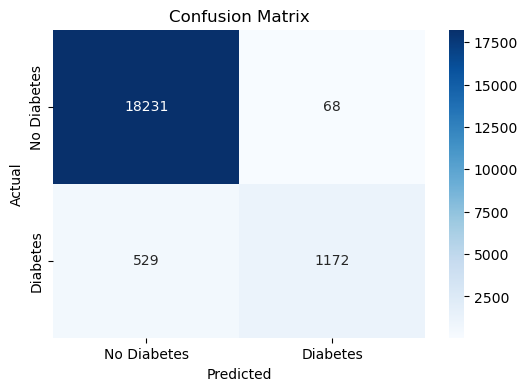

In [79]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

/var/folders/gp/j593vlkj0jjbz68g1hsn82wh0000gn/T/ipykernel_85402/2501713640.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['y_test'], label='Y Test', shade=True)
/var/folders/gp/j593vlkj0jjbz68g1hsn82wh0000gn/T/ipykernel_85402/2501713640.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['y_pred'], label='Y Predicted', shade=True)


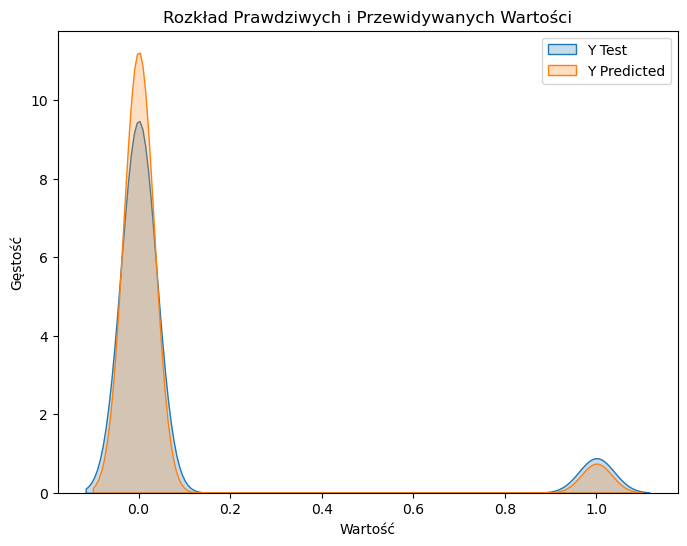

In [80]:
import seaborn as sns

# Tworzenie DataFrame z prawdziwymi i przewidywanymi wartościami
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Rysowanie wykresu rozkładów
plt.figure(figsize=(8,6))
sns.kdeplot(results['y_test'], label='Y Test', shade=True)
sns.kdeplot(results['y_pred'], label='Y Predicted', shade=True)
plt.title('Rozkład Prawdziwych i Przewidywanych Wartości')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.show()

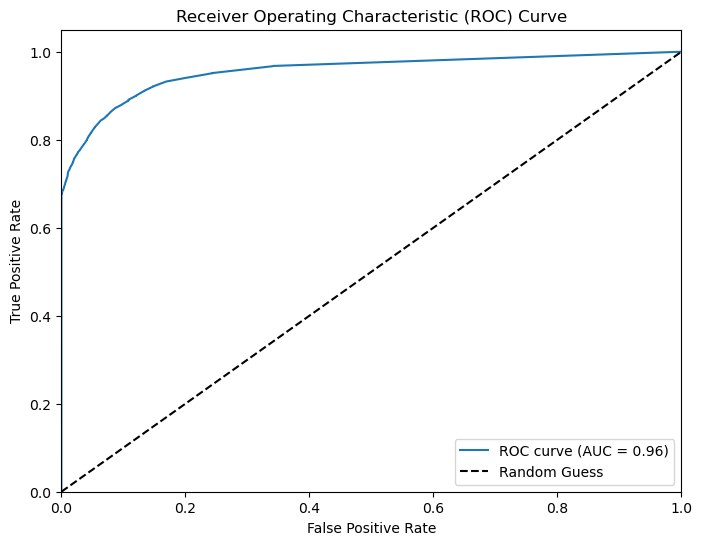

In [84]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obliczanie prawdopodobieństw dla klasy pozytywnej
y_probs = model.predict_proba(X_test)[:, 1]

# Obliczanie wartości FPR, TPR i progów
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Obliczanie AUC
auc = roc_auc_score(y_test, y_probs)

# Rysowanie krzywej ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Classification Report**

The classification report provides detailed metrics about the model's performance.

In [30]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



**Feature Importance**

Understanding which features contribute most to the prediction can provide valuable insights.

In [31]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()

ValueError: Length of values (15) does not match length of index (8)

### Conclusion
The Random Forest model achieved an accuracy of approximately 95%, indicating a high level of performance in predicting diabetes based on the provided features. The confusion matrix and classification report further confirm the model's reliability, showing minimal false positives and false negatives. Feature importance analysis reveals which factors are most influential in the predictions, providing valuable insights for healthcare professionals.



**Additional Recommendations**

Hyperparameter Tuning: Utilize techniques like GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for the Random Forest model, potentially enhancing its performance.

In [30]:
from sklearn.model_selection import GridSearchCV
import joblib
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

# Save the best model
model_filename = 'best_random_forest_model.joblib'
joblib.dump(grid_search.best_estimator_, model_filename)
print(f'Best model saved as {model_filename}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  15.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  15.1s
[CV] END max_depth=None, 

Accuracy of the loaded model: 0.97

Classification Report for Loaded Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



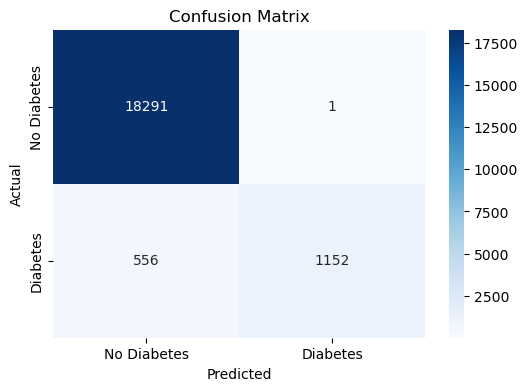

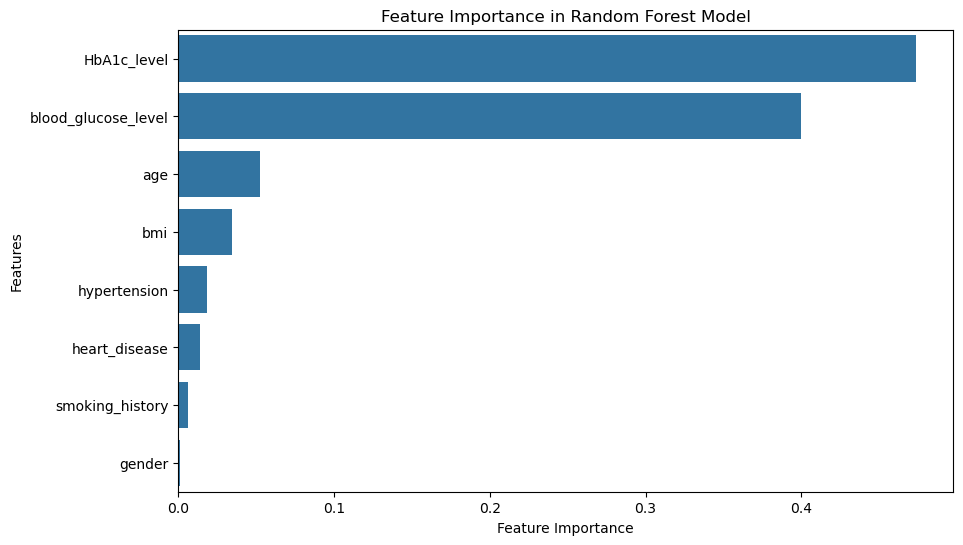

In [31]:
loaded_model = joblib.load(model_filename)
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Accuracy of the loaded model: {accuracy_loaded:.2f}')
print('\nClassification Report for Loaded Model:')
print(classification_report(y_test, y_pred_loaded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = loaded_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()

**Cross-Validation:**
 Implement cross-validation using cross_val_score to obtain a more robust evaluation of the model's performance.

In [32]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean():.2f}')

Cross-Validation Scores: [0.97035 0.97095 0.9679  0.9708  0.97045]
Average CV Score: 0.97


**Handling Imbalanced Data:**
 If the dataset has an imbalanced distribution of classes, consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling to balance the classes

In [34]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = model.predict(X_test)

# Evaluate the model
print(f'Accuracy after SMOTE: {accuracy_score(y_test, y_pred_resampled):.2f}')
print('Classification Report after SMOTE:\n', classification_report(y_test, y_pred_resampled))

Accuracy after SMOTE: 0.96
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.77      0.74      0.76      1708

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000



**Feature Engineering:**
Explore creating new features or transforming existing ones to provide the model with more informative inputs.

In [ ]:
# Example: Creating BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Encode the new categorical feature
df['bmi_category'] = le.fit_transform(df['bmi_category'])

# Redefine features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Continue with scaling and model training...